##### Dataset

In [2]:
# Salary_Data.csv
# https://mitu.co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/home/mitu/Salary_Data.csv')

In [5]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [8]:
x = df[['YearsExperience']]
y = df['Salary']

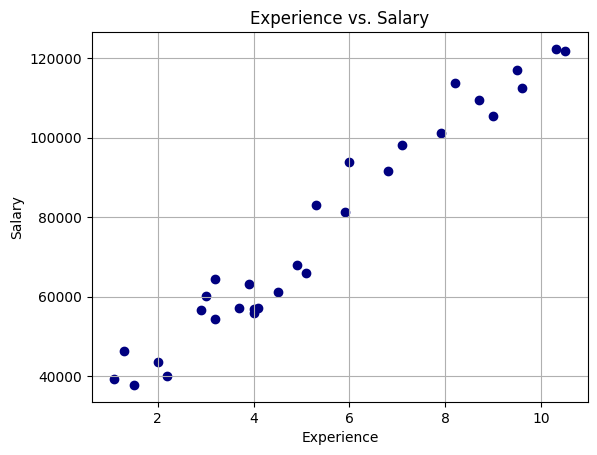

In [10]:
plt.title('Experience vs. Salary')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'navy');

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##### Cross-Validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [15]:
x_train.shape

(22, 1)

In [16]:
x_test.shape

(8, 1)

In [17]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression()

In [20]:
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
regressor.intercept_

26986.691316737248

In [22]:
regressor.coef_

array([9379.71049195])

In [23]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [24]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
Name: Salary, dtype: int64

In [25]:
y_pred = regressor.predict(x_test)

In [28]:
result = pd.DataFrame({
    'EXperience': x_test.values.flatten(),
    'Salary': y_test,
    'Predicted by Algorithm': y_pred
})

In [29]:
result

,EXperience,Salary,Predicted by Algorithm
2,1.5,37731,41056.257055
28,10.3,122391,123597.709384
13,4.1,57081,65443.504334
10,3.9,63218,63567.562235
26,9.5,116969,116093.940990
24,8.7,109431,108590.172597
27,9.6,112635,117031.912039
11,4.0,55794,64505.533285


##### Mean Absolute Error

In [33]:
abs(y_test - y_pred).mean()

3508.5455930660555

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

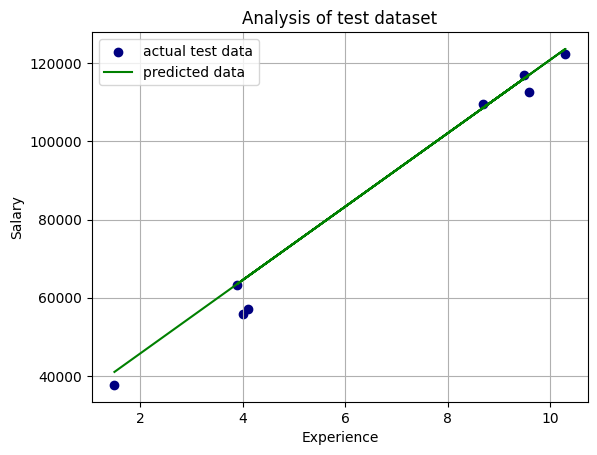

In [38]:
plt.title('Analysis of test dataset')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x_test, y_test, color = 'navy', label = 'actual test data');
plt.plot(x_test, y_pred, color = 'green', label='predicted data');
plt.legend()

In [39]:
y_pred = regressor.predict(x)

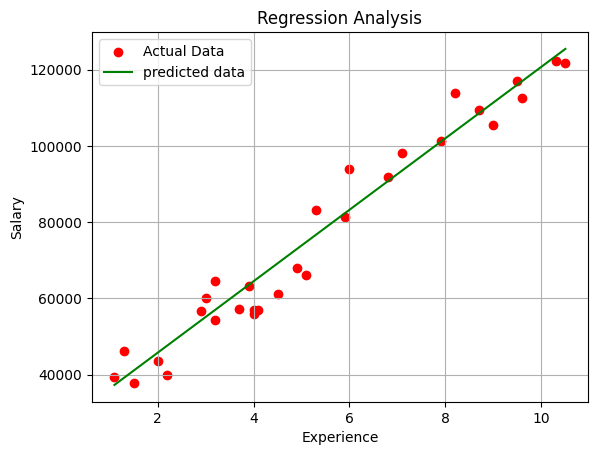

In [40]:
plt.title('Regression Analysis')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'red', label = 'Actual Data');
plt.plot(x, y_pred, color = 'green', label='predicted data');
plt.legend()

In [41]:
y_pred

array([ 37304.37285788,  39180.31495627,  41056.25705466,  45746.11230063,
        47622.05439902,  54187.85174338,  55125.82279258,  57001.76489096,
        57001.76489096,  61691.62013694,  63567.56223533,  64505.53328452,
        64505.53328452,  65443.50433372,  69195.38853049,  72947.27272727,
        74823.21482566,  76699.15692405,  82326.98321922,  83264.95426841,
        90768.72266197,  93582.63580955, 101086.40420311, 103900.31735069,
       108590.17259667, 111404.08574425, 116093.94099022, 117031.91203942,
       123597.70938378, 125473.65148217])

In [42]:
regressor.predict([[12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [43]:
regressor.predict([[15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167682.34869593])

In [44]:
regressor.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([214580.90115566])

In [45]:
# r-squared error
regressor.score(x, y)

0.955975487542377

In [49]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)
# Accuracy

0.955975487542377

In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

4724.65759422699

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y, y_pred)

0.07278049089506371

In [54]:
# mean squared error
np.mean((y - y_pred) ** 2)

31983775.798633035

In [56]:
# root mean squared error
np.sqrt(np.mean((y - y_pred) ** 2))

5655.4200373299445

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

31983775.798633035